Udemy cleaning with python

Analysis Using Subject

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('udemy_courses_clean.csv')
df.head()

def fun_draw(x,y):
    plt.figure(figsize=(10,5))
    sns.barplot(x=x, y=y, data=df)
    plt.title('plot of {} per {}'.format(x,y))
    plt.show()

def fun_pie(x,y):
    plt.figure(figsize=(8,8))
    df.groupby(x)[y].sum().plot(kind='pie', autopct='%1.1f%%' , startangle=90)
    plt.title('Pie chart of {} per {}'.format(y,x))
    plt.show()    

In [3]:
df.describe()

,Unnamed: 0,course_id,num_subscribers,num_reviews,num_lectures
count,3683.000000,3.683000e+03,3683.000000,3683.000000,3683.000000
mean,1841.000000,6.764546e+05,3193.371165,156.448004,40.062178
std,1063.334848,3.437217e+05,9498.231406,935.078241,50.366788
min,0.000000,8.324000e+03,0.000000,0.000000,0.000000
25%,920.500000,4.077270e+05,110.000000,4.000000,15.000000
50%,1841.000000,6.882440e+05,911.000000,18.000000,25.000000
75%,2761.500000,9.617290e+05,2537.500000,67.000000,45.000000
max,3682.000000,1.282064e+06,268923.000000,27445.000000,779.000000


In [4]:
df.sample(5)

,Unnamed: 0,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_course_title
1922,1922,1105794,Piano Music Theory (Back To Basics) by JFilt,https://www.udemy.com/piano-music-theory-back-...,False,Free,4967,308,12,Beginner Level,30 mins,2017-02-13T23:03:35Z,Musical Instruments,Piano Music Theory Back Basics JFilt
2071,2071,17922,Play Ukulele Now,https://www.udemy.com/play-ukulele/,True,30,1951,88,78,All Levels,5 hours,2012-06-02T21:40:53Z,Musical Instruments,Play Ukulele
1685,1685,852060,Essential Skills for Designers - Adobe Bridge,https://www.udemy.com/essential-skills-for-des...,True,20,14,5,13,All Levels,1 hour,2016-05-17T23:40:40Z,Graphic Design,Essential Skills Designers Adobe Bridge
2831,2831,797832,Getting Started with WordPress 2016,https://www.udemy.com/getting-started-with-wor...,True,20,1613,21,20,Beginner Level,1 hour,2016-04-14T05:38:18Z,Web Development,Getting Started WordPress 2016
838,838,430968,Financial Management Capital Market Instruments,https://www.udemy.com/capital-market-instruments/,True,25,2650,5,17,Beginner Level,1 hour,2015-02-24T14:30:21Z,Business Finance,Financial Management Capital Market Instruments


In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           3683 non-null   int64 
 1   course_id            3683 non-null   int64 
 2   course_title         3683 non-null   object
 3   url                  3683 non-null   object
 4   is_paid              3683 non-null   bool  
 5   price                3683 non-null   object
 6   num_subscribers      3683 non-null   int64 
 7   num_reviews          3683 non-null   int64 
 8   num_lectures         3683 non-null   int64 
 9   level                3683 non-null   object
 10  content_duration     3683 non-null   object
 11  published_timestamp  3683 non-null   object
 12  subject              3683 non-null   object
 13  clean_course_title   3663 non-null   object
dtypes: bool(1), int64(5), object(8)
memory usage: 377.8+ KB


In [6]:
df.isnull().sum()

Unnamed: 0              0
course_id               0
course_title            0
url                     0
is_paid                 0
price                   0
num_subscribers         0
num_reviews             0
num_lectures            0
level                   0
content_duration        0
published_timestamp     0
subject                 0
clean_course_title     20
dtype: int64

In [7]:
#SUBJECT

In [8]:
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [9]:
df['subject'].value_counts()

subject
Web Development        1200
Business Finance       1199
Musical Instruments     681
Graphic Design          603
Name: count, dtype: int64

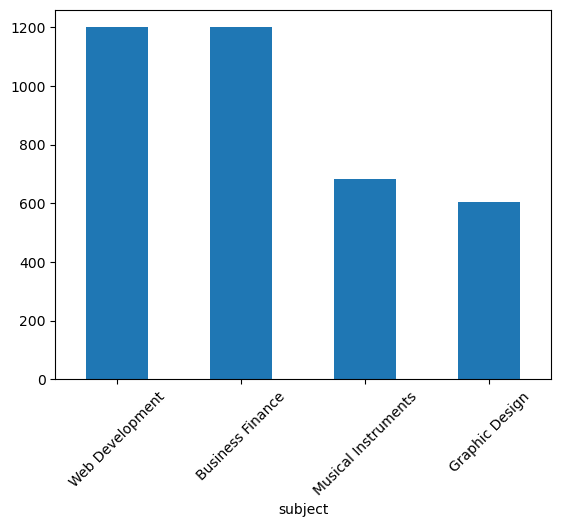

In [10]:
df['subject'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

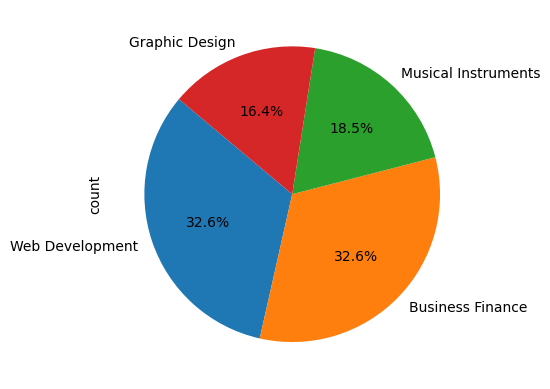

In [11]:
df['subject'].value_counts().plot(kind='pie' , autopct='%1.1f%%', startangle=140)

plt.show()

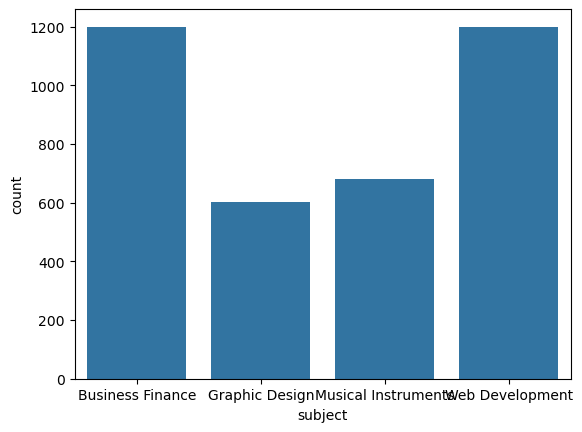

In [12]:
plt.Figure(figsize=(10,6))
sns.countplot(data=df, x='subject')
plt.xticks(rotation=360)
plt.color = sns.color_palette("pastel6")
plt.show()

Analysis Using num_subscribers

In [13]:
df[['num_subscribers','subject']].groupby('subject').sum().sort_values(by='num_subscribers', ascending=False)

,num_subscribers
subject,
Web Development,7980572
Business Finance,1870747
Graphic Design,1063148
Musical Instruments,846719


In [14]:
x=(df[['num_subscribers','subject']].groupby('subject').sum().sort_values(by='num_subscribers', ascending=False))

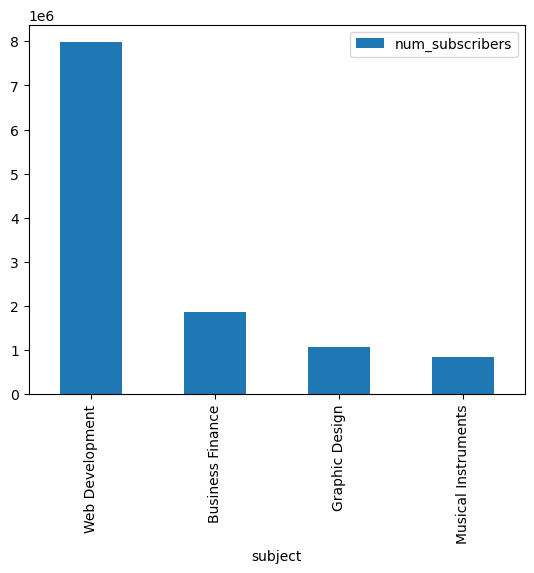

In [15]:
x.plot(kind='bar')
plt.show()

In [16]:
df['num_subscribers'].describe()

count      3683.000000
mean       3193.371165
std        9498.231406
min           0.000000
25%         110.000000
50%         911.000000
75%        2537.500000
max      268923.000000
Name: num_subscribers, dtype: float64

In [17]:
df['course_title'].where(df['num_subscribers'] == df['num_subscribers'].max()).dropna()

2832    Learn HTML5 Programming From Scratch
Name: course_title, dtype: object

In [18]:
df[['num_subscribers','is_paid']].groupby('is_paid').sum().sort_values(by='num_subscribers', ascending=False)

,num_subscribers
is_paid,
True,8185661
False,3575525


In [19]:
a =(df[['num_subscribers','is_paid']].groupby('is_paid').sum().sort_values(by='num_subscribers', ascending=False))

<Axes: ylabel='num_subscribers'>

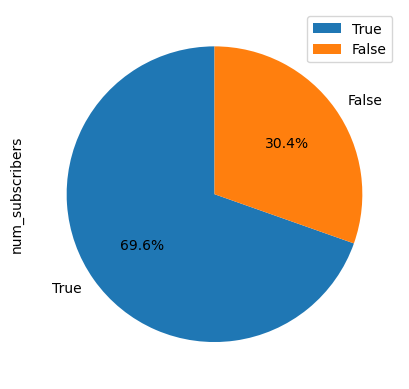

In [20]:
a.plot(kind='pie', y='num_subscribers', autopct='%1.1f%%', startangle=90 )

In [21]:
df['price'] = pd.to_numeric(df['price'], errors = 'coerce')

In [22]:
df['price'].describe()

count    3372.000000
mean       72.078885
std        60.195782
min        20.000000
25%        25.000000
50%        50.000000
75%       100.000000
max       200.000000
Name: price, dtype: float64

In [23]:
df['price_category'] = pd.cut(df['price'], bins=[0,70,150,200], labels=['cheap','moderate','expensive'])

In [24]:
df[['num_subscribers','price_category']].groupby('price_category').sum().sort_values(by='num_subscribers', ascending=False)
b=(df[['num_subscribers','price_category']].groupby('price_category').sum().sort_values(by='num_subscribers', ascending=False))

C:\Users\watan\AppData\Local\Temp\ipykernel_9776\3423291915.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['num_subscribers','price_category']].groupby('price_category').sum().sort_values(by='num_subscribers', ascending=False)
C:\Users\watan\AppData\Local\Temp\ipykernel_9776\3423291915.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  b=(df[['num_subscribers','price_category']].groupby('price_category').sum().sort_values(by='num_subscribers', ascending=False))


<Axes: xlabel='price_category'>

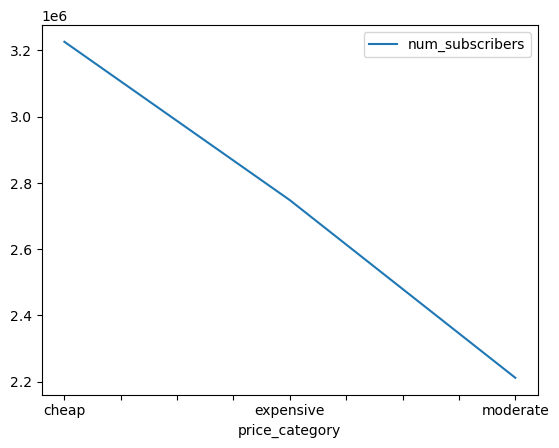

In [25]:
b.plot(kind='line')

Analysis Using Level

In [26]:
df['level'].unique()

array(['All Levels', 'Intermediate Level', 'Beginner Level',
       'Expert Level', '52'], dtype=object)

In [27]:
f=(df['level']=='52')
df[f]

,Unnamed: 0,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_course_title,price_category
2066,2066,96698,Learn Classical Guitar Technique and play 'Spa...,"000!""",True,NaN,30,1463,29,52,Beginner Level,3 hours,Musical Instruments,Learn Classical Guitar Technique play Spanish ...,NaN


In [28]:
df['level'] = df['level'].replace({'52':'Beginner Level'})  

In [29]:
df['level'].value_counts()

level
All Levels            1932
Beginner Level        1272
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

<Axes: xlabel='level'>

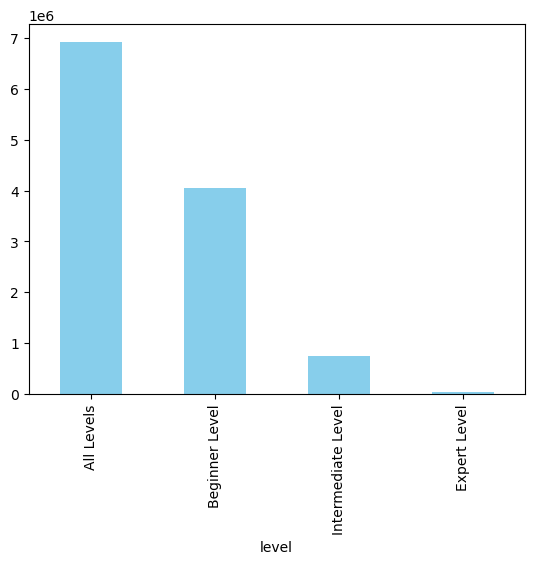

In [30]:
df.groupby('level')['num_subscribers'].sum().sort_values(ascending=False).plot(kind='bar', color='skyblue')

In [31]:
df[['level','subject']]

,level,subject
0,All Levels,Business Finance
1,All Levels,Business Finance
2,Intermediate Level,Business Finance
3,All Levels,Business Finance
4,Intermediate Level,Business Finance
...,...,...
3678,All Levels,Web Development
3679,Beginner Level,Web Development
3680,All Levels,Web Development
3681,All Levels,Web Development


<Axes: xlabel='subject,level'>

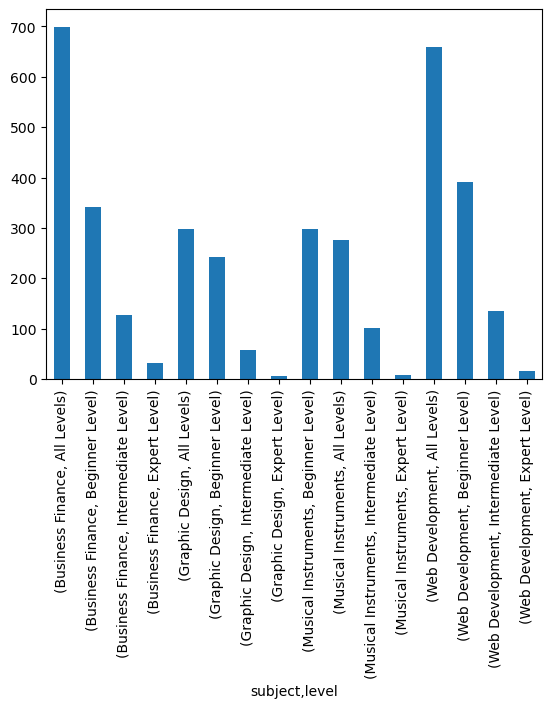

In [32]:
df.groupby('subject')['level'].value_counts().plot(kind='bar')

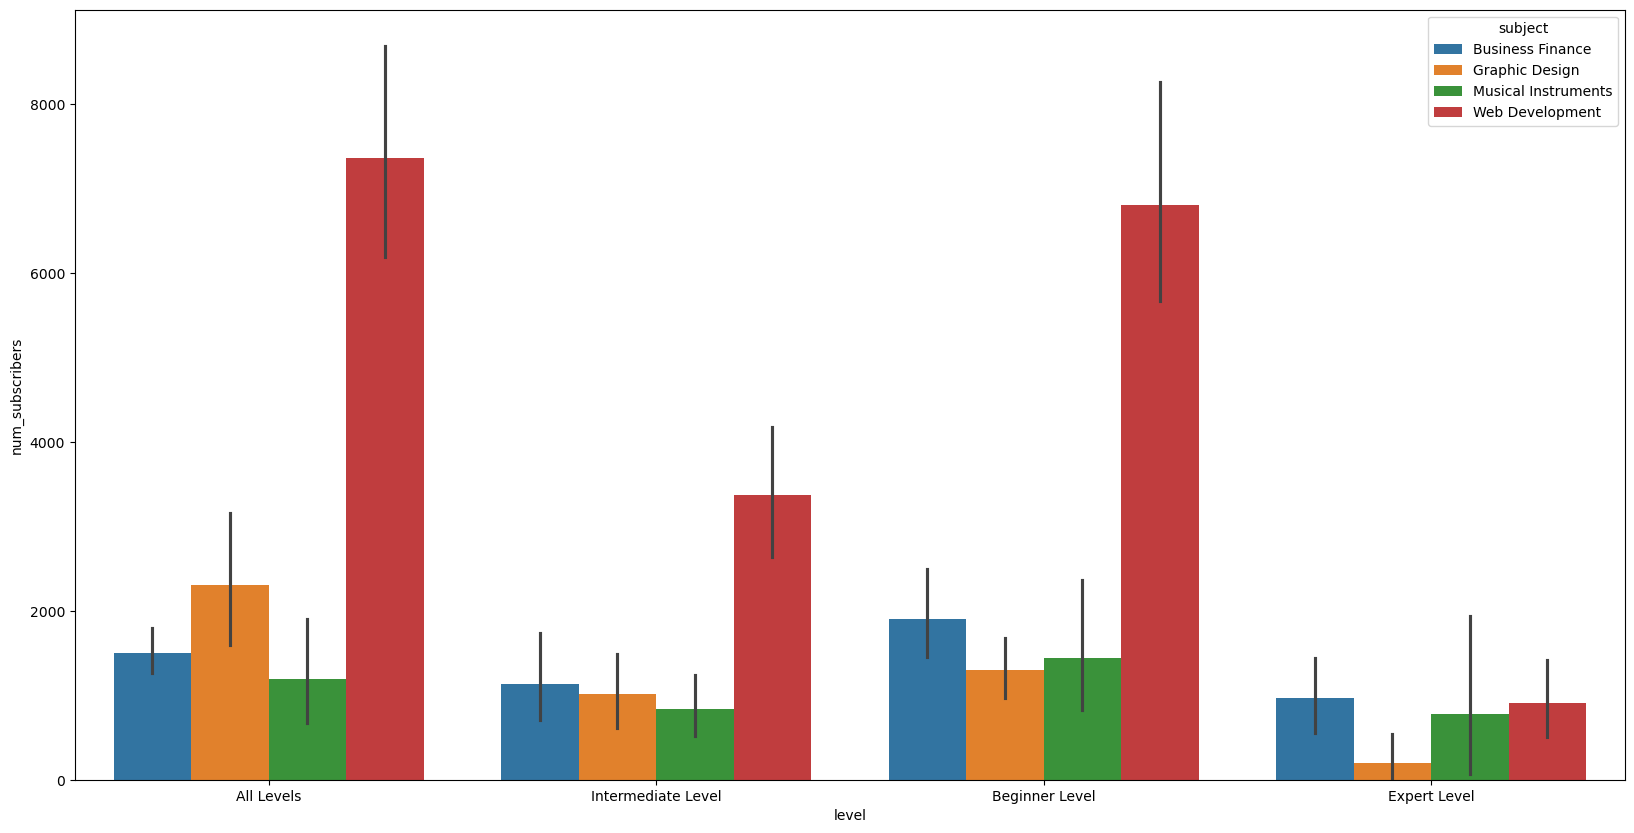

In [33]:
plt.figure(figsize=(20,10))
sns.barplot(x='level', y='num_subscribers', data=df,hue='subject')
plt.show()


Lectures


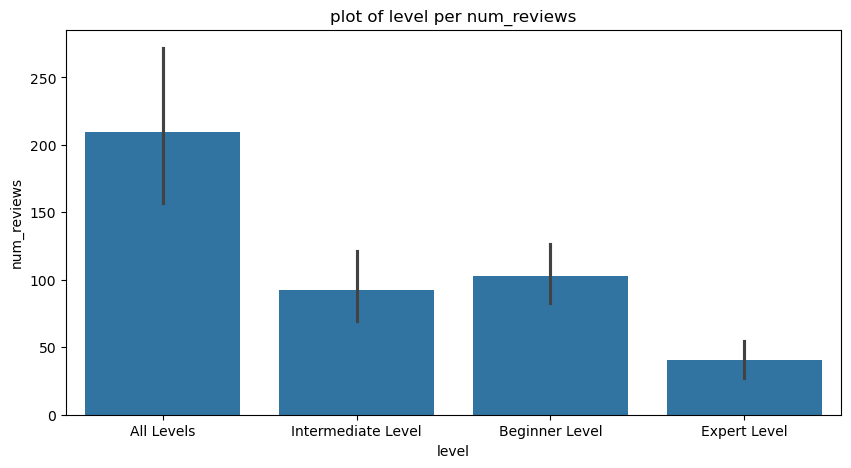

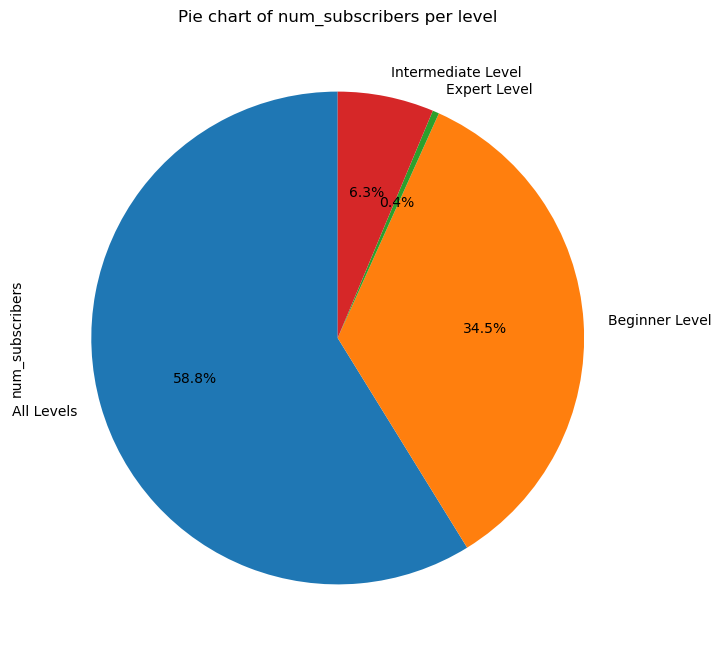

In [34]:
fun_draw('level', 'num_reviews')
fun_pie('level', 'num_subscribers')

Price

In [35]:
#clean price column by replacing 'Free' with '0'
df['price'] = df['price'].replace({'Free':'0'})

In [36]:
df['price'].dtype
df['price'] = pd.to_numeric(df['price'], errors = 'coerce')
df['price'].unique()

array([200.,  75.,  45.,  95., 150.,  65., 195.,  30.,  20.,  50., 175.,
       140., 115., 190., 125.,  60., 145., 105., 155., 185., 180., 120.,
        25., 160.,  40.,  nan, 100.,  90.,  35.,  80.,  70.,  55., 165.,
       130.,  85., 170., 110., 135.])

In [37]:
df['price'].isna

<bound method Series.isna of 0       200.0
1        75.0
2        45.0
3        95.0
4       200.0
        ...  
3678    100.0
3679     25.0
3680     40.0
3681     50.0
3682     45.0
Name: price, Length: 3683, dtype: float64>

In [38]:
df['price'].describe()

count    3372.000000
mean       72.078885
std        60.195782
min        20.000000
25%        25.000000
50%        50.000000
75%       100.000000
max       200.000000
Name: price, dtype: float64

In [42]:
df.iloc[df['price'].idxmax()]

Unnamed: 0                                                             0
course_id                                                        1070968
course_title                          Ultimate Investment Banking Course
url                    https://www.udemy.com/ultimate-investment-bank...
is_paid                                                             True
price                                                              200.0
num_subscribers                                                     2147
num_reviews                                                           23
num_lectures                                                          51
level                                                         All Levels
content_duration                                               1.5 hours
published_timestamp                                 2017-01-18T20:58:58Z
subject                                                 Business Finance
clean_course_title                    Ultimate Inve

In [45]:
#how much udemy earn = number of subscribers * price per course
df[['num_subscribers','price']]

,num_subscribers,price
0,2147,200.0
1,2792,75.0
2,2174,45.0
3,2451,95.0
4,1276,200.0
...,...,...
3678,1040,100.0
3679,306,25.0
3680,513,40.0
3681,300,50.0


In [49]:
df.groupby('price')['num_subscribers'].sum().sort_values(ascending=False)

price
200.0    1336331
20.0     1320658
195.0     939254
50.0      717383
100.0     410491
75.0      410166
150.0     376202
95.0      347949
30.0      288750
40.0      200217
25.0      170861
175.0     167675
120.0     167452
60.0      157151
190.0     142439
145.0     124118
35.0      116300
80.0      100207
45.0       99011
180.0      90366
65.0       61281
125.0      48257
55.0       47561
70.0       46791
140.0      45169
90.0       41585
110.0      37344
115.0      34497
85.0       28806
105.0      21613
170.0      20350
135.0      16909
185.0      16886
165.0      13377
155.0      12356
160.0       8904
130.0        964
Name: num_subscribers, dtype: int64

In [51]:
df['profit']= df['num_subscribers'] * df['price']
df['profit']

0       429400.0
1       209400.0
2        97830.0
3       232845.0
4       255200.0
          ...   
3678    104000.0
3679      7650.0
3680     20520.0
3681     15000.0
3682     40545.0
Name: profit, Length: 3683, dtype: float64

In [53]:
df['profit'].describe()

count    3.372000e+03
mean     2.624503e+05
std      1.043120e+06
min      0.000000e+00
25%      3.437500e+03
50%      3.173500e+04
75%      1.384400e+05
max      2.431680e+07
Name: profit, dtype: float64

In [54]:
df.iloc[df['profit'].idxmax()]

Unnamed: 0                                                          3235
course_id                                                         625204
course_title                                  The Web Developer Bootcamp
url                    https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                             True
price                                                              200.0
num_subscribers                                                   121584
num_reviews                                                        27445
num_lectures                                                         342
level                                                         All Levels
content_duration                                                43 hours
published_timestamp                                 2015-11-02T21:13:27Z
subject                                                  Web Development
clean_course_title                                W

Is_paid

In [55]:
df['is_paid'].value_counts()

is_paid
True     3373
False     310
Name: count, dtype: int64

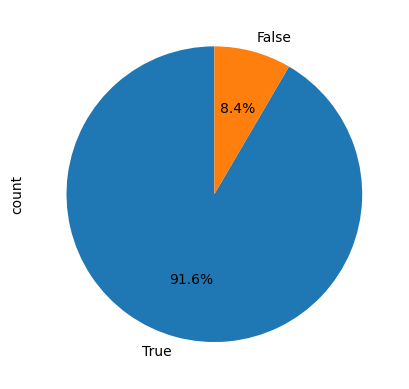

In [57]:
df['is_paid'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.show()

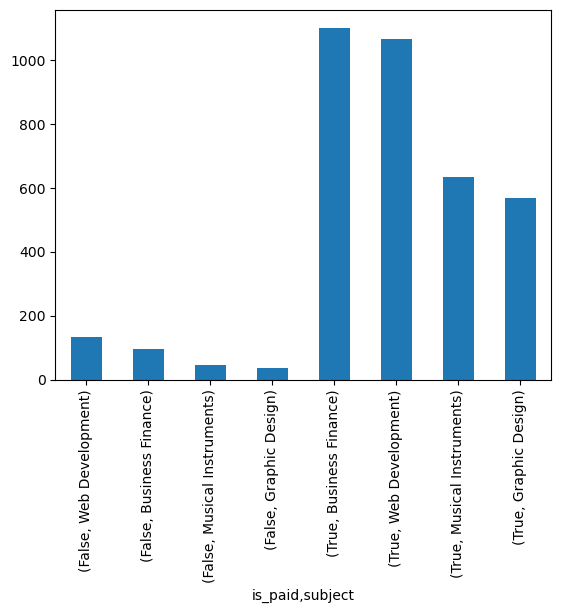

In [75]:
df.groupby('is_paid')['subject'].value_counts().plot(kind='bar')
plt.show()

Course Title

In [78]:
df['course_title'].str.len()

0       34
1       59
2       56
3       50
4       44
        ..
3678    56
3679    55
3680    29
3681    54
3682    52
Name: course_title, Length: 3683, dtype: int64

In [80]:
df['course_title_len'] = df['course_title'].str.len()

Published  TimeStamp

In [ ]:
df['published_timestamp']

0       2017-01-18T20:58:58Z
1       2017-03-09T16:34:20Z
2       2016-12-19T19:26:30Z
3       2017-05-30T20:07:24Z
4       2016-12-13T14:57:18Z
                ...         
3678    2016-06-14T17:36:46Z
3679    2017-03-10T22:24:30Z
3680    2015-12-30T16:41:42Z
3681    2016-08-11T19:06:15Z
3682    2014-09-28T19:51:11Z
Name: published_timestamp, Length: 3683, dtype: object

In [83]:
df['published_date'] = df['published_timestamp'].str.split('T').str[0]

In [87]:
df['published_date']

0       2017-01-18
1       2017-03-09
2       2016-12-19
3       2017-05-30
4       2016-12-13
           ...    
3678    2016-06-14
3679    2017-03-10
3680    2015-12-30
3681    2016-08-11
3682    2014-09-28
Name: published_date, Length: 3683, dtype: object

In [ ]:
df['published_date'] =df['published_date'].str.replace('3 hours', '2017-01-18')

In [ ]:
df['published_date'] = pd.to_datetime(df['published_date'], format ='%Y-%m-%d')

In [91]:
df['published-year'] = df['published_date'].dt.year
df['published_month'] = df['published_date'].dt.month
df['published_day'] = df['published_date'].dt.day

<Axes: xlabel='published-year'>

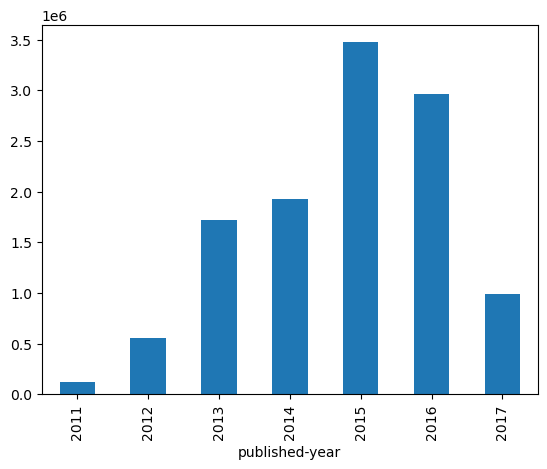

In [95]:
df.groupby('published-year')['num_subscribers'].sum().plot(kind='bar')

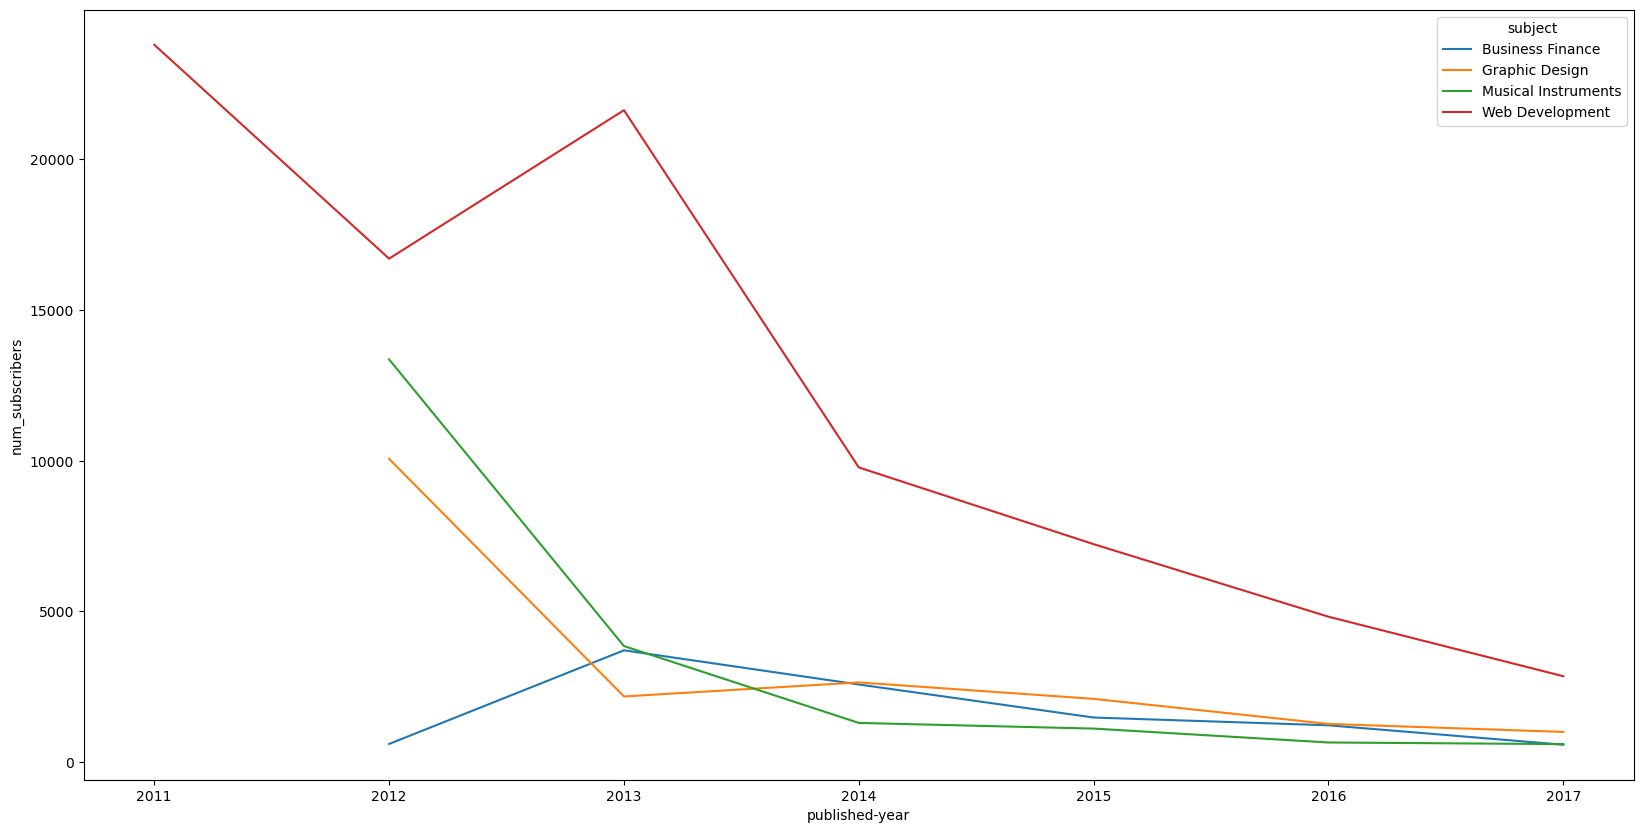

In [98]:
plt.figure(figsize=(20,10))
sns.lineplot(x='published-year', y='num_subscribers', data=df,hue='subject',errorbar=None)
plt.show()